### EDA

In [2]:
# Importando libraries para EDA e manipulação de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#Libraries para os modelos e tunagem de parâmetros no estudo
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Carregar a série temporal
data = pd.read_csv('STP-20240926172728724.csv', encoding='ISO-8859-1', sep=';', parse_dates=['Data'], index_col='Data')


In [9]:
# Converte a coluna removendo pontos e trocando a vírgula por ponto
data['1184 - Saldo em juros flutuantes outros de depositos a prazo (CDB/RDB) - Pessoas fisicas - u.m.c. (mil)'] = (
    data['1184 - Saldo em juros flutuantes outros de depositos a prazo (CDB/RDB) - Pessoas fisicas - u.m.c. (mil)']
    .str.replace('.', '', regex=False)  # Remove os pontos
    .str.replace(',', '.', regex=False)  # Troca a vírgula por ponto
    .astype(float)                       # Converte para float
)

# Verifica a conversão
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6048 entries, 03/01/2000 to 31/01/2024
Data columns (total 1 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   1184 - Saldo em juros flutuantes outros de depositos a prazo (CDB/RDB) - Pessoas fisicas - u.m.c. (mil)  6048 non-null   float64
dtypes: float64(1)
memory usage: 94.5+ KB
None
            1184 - Saldo em juros flutuantes outros de depositos a prazo (CDB/RDB) - Pessoas fisicas - u.m.c. (mil)
Data                                                                                                               
03/01/2000                                           22082.97                                                      
04/01/2000                                           22093.02                          

In [10]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6048 entries, 03/01/2000 to 31/01/2024
Data columns (total 1 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   1184 - Saldo em juros flutuantes outros de depositos a prazo (CDB/RDB) - Pessoas fisicas - u.m.c. (mil)  6048 non-null   float64
dtypes: float64(1)
memory usage: 94.5+ KB


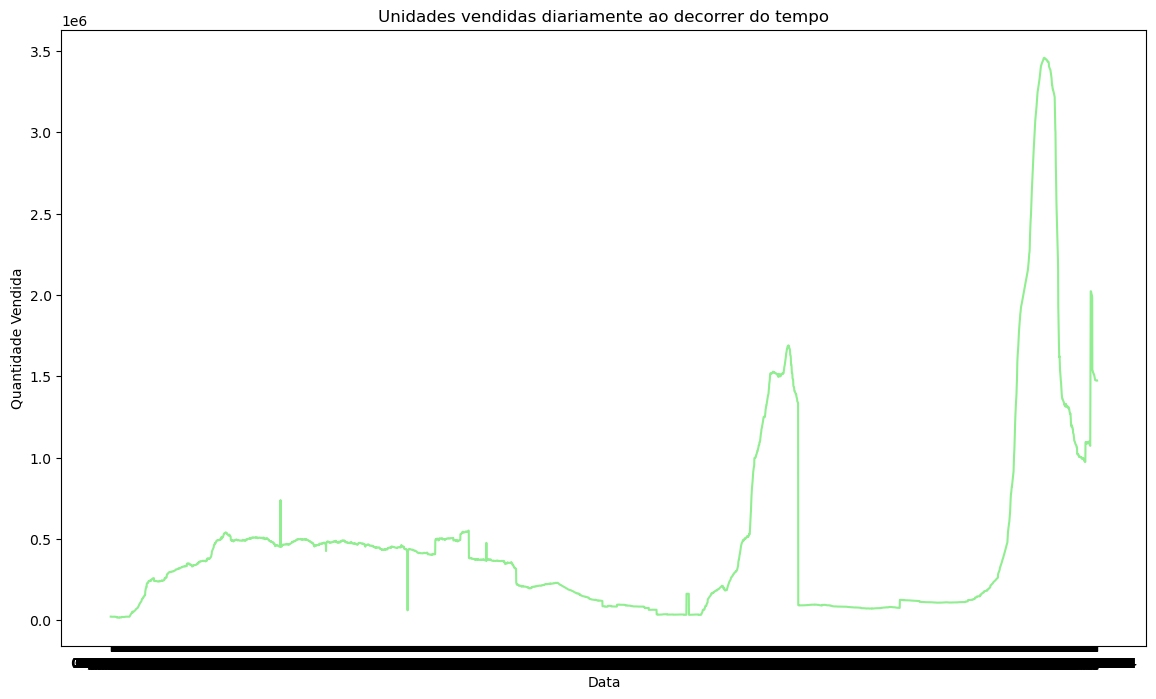

In [11]:
plt.figure(figsize=(14, 8))
plt.plot(df, label='Total Vendido por Dia', color='lightgreen')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.title('Unidades vendidas diariamente ao decorrer do tempo')

plt.show()

### Decomposição e teste ADF

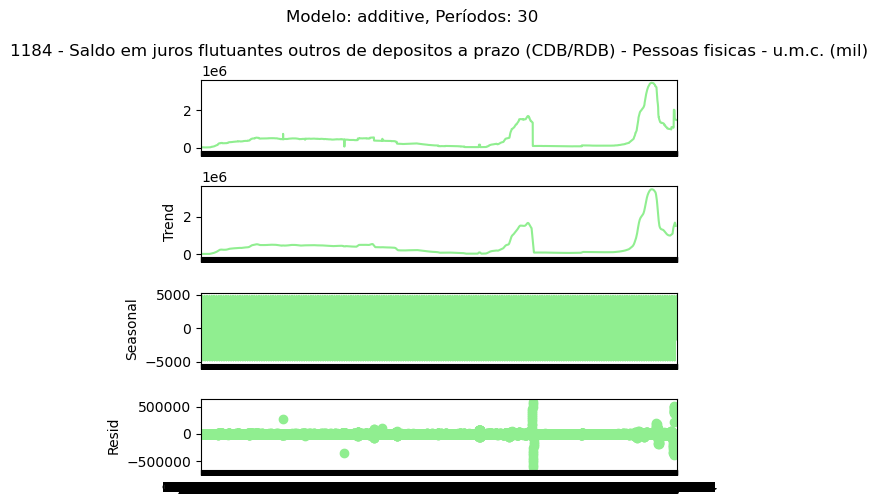

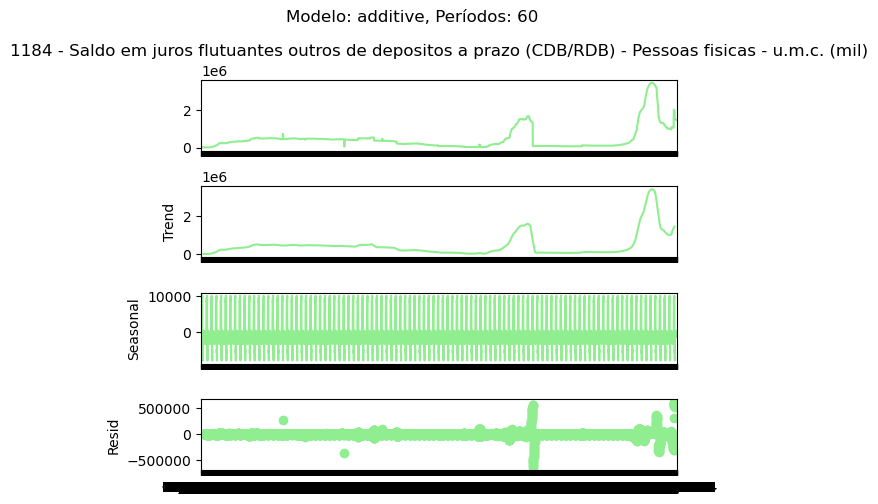

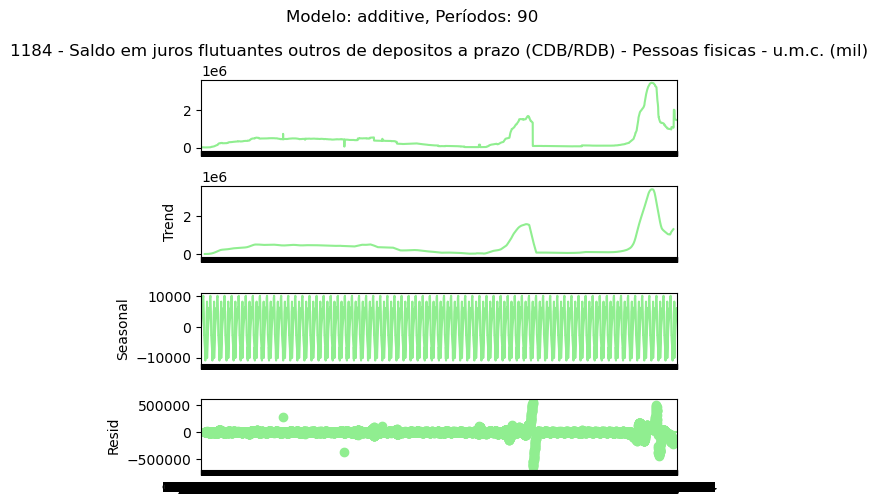

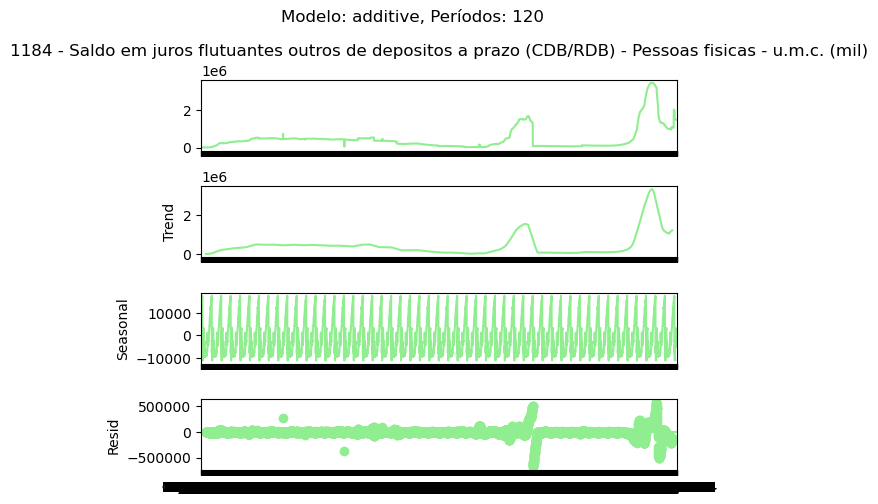

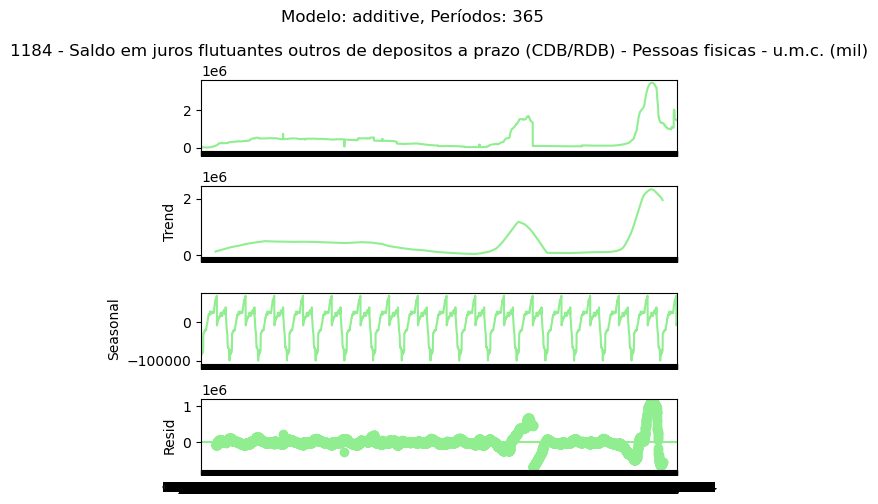

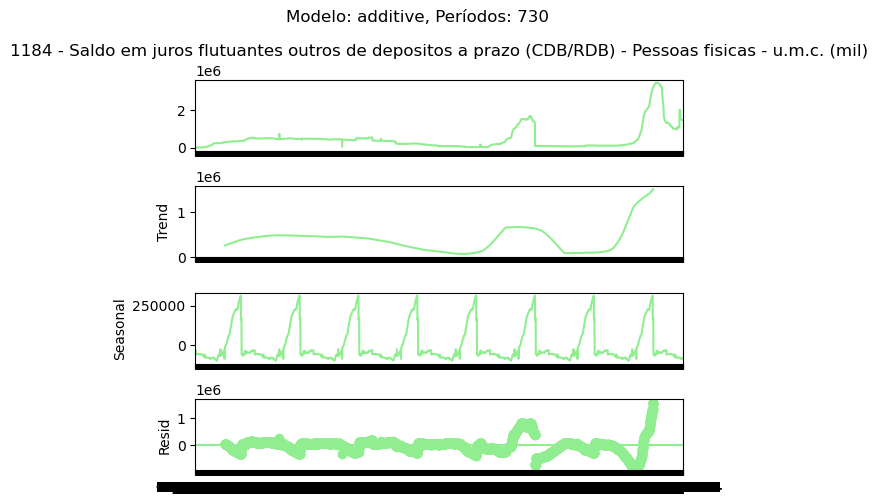

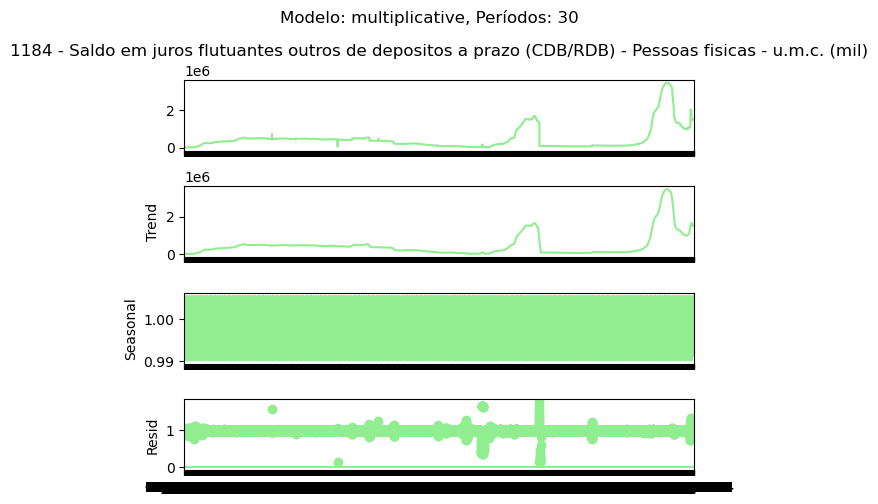

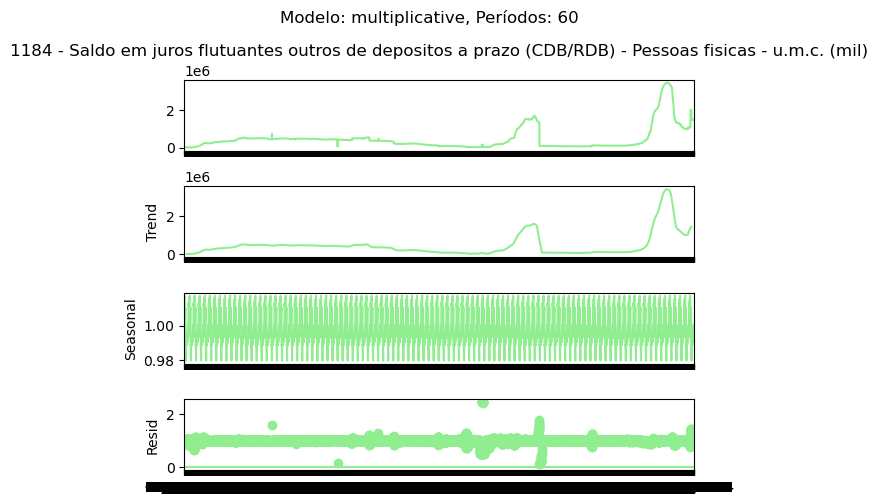

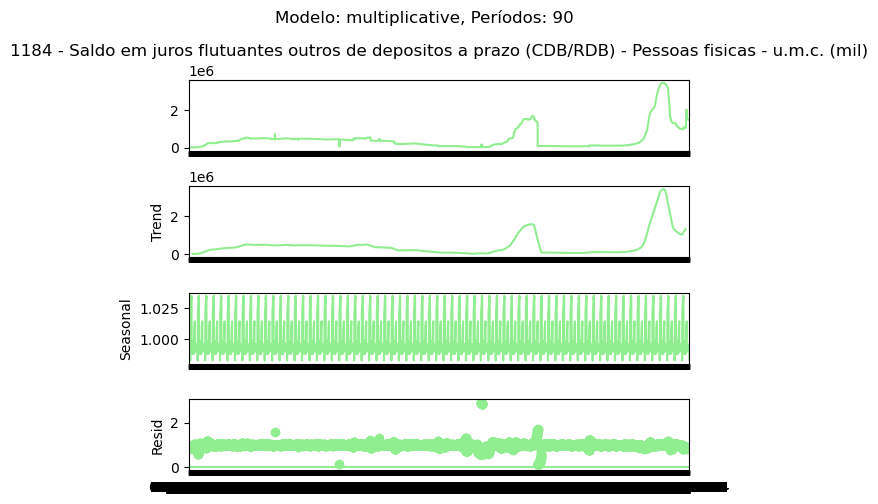

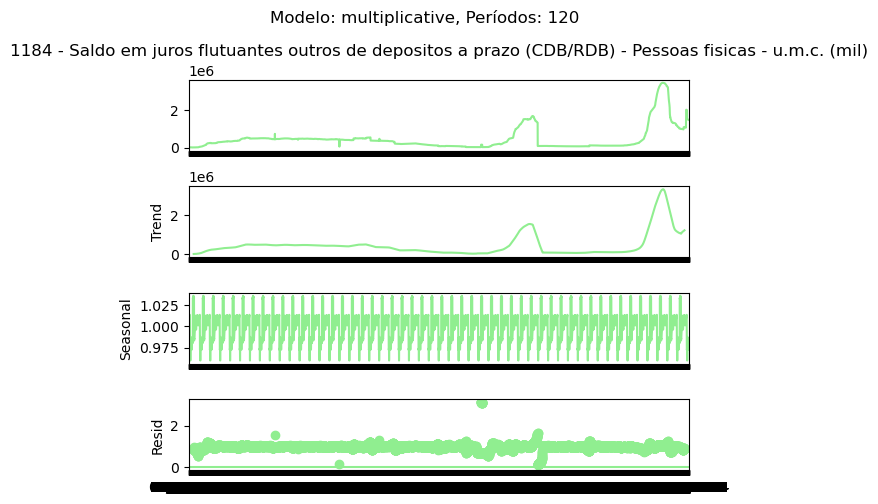

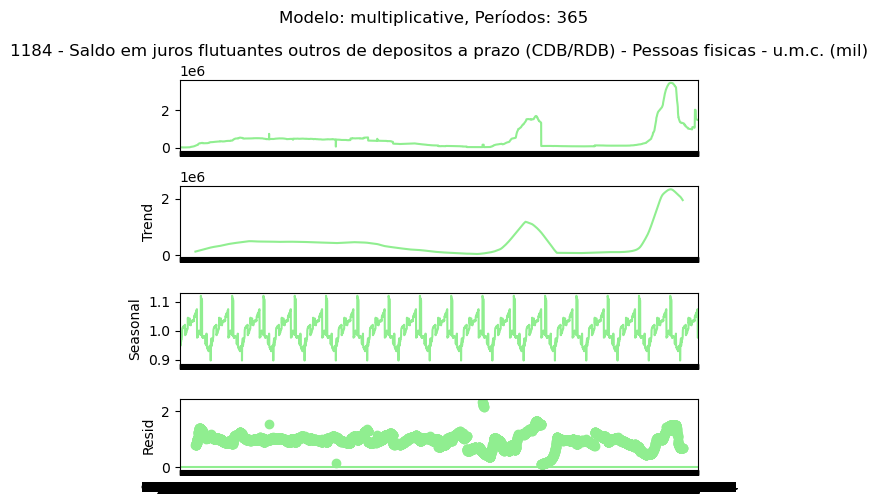

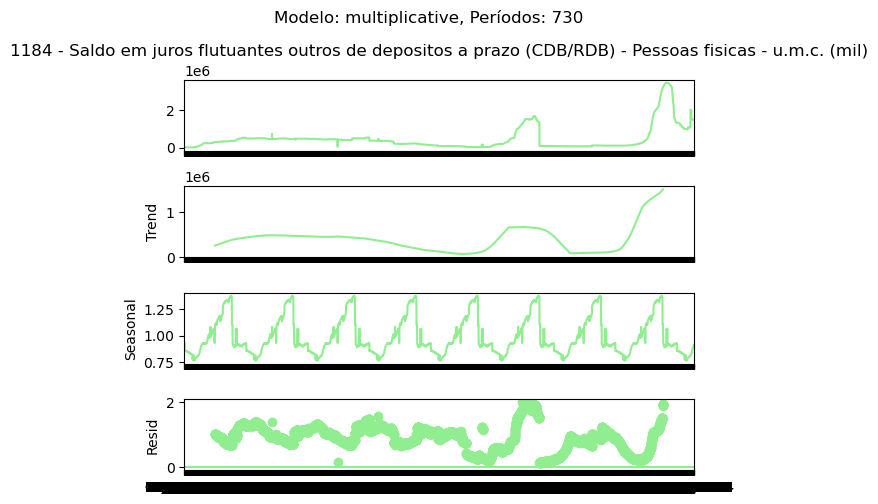

In [13]:
def plot_seasonal_decompose(df):
    periods = [30, 60, 90, 120, 365, 730]
    models = ['additive', 'multiplicative']
    
    for model in models:
        for period in periods:
            result = seasonal_decompose(df.iloc[:, 0], model=model, period=period)
            
            fig = result.plot()
            plt.suptitle(f'Modelo: {model}, Períodos: {period}', y=1.04)

            for ax in fig.get_axes():
                for line in ax.get_lines():
                    line.set_color('lightgreen')
            plt.show()
            
            
plot_seasonal_decompose(df)